In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from collections import Counter
import ast
import os
import csv
from datetime import datetime, timedelta
# initalize wd to visualization folder
os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization')
print(os.getcwd())

C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization


# Top 5 (Pie) and Top 10 (Donut) Companies Mentioned in Company Twits

In [135]:
def MakePieChart(data, symbol):
    getCount = Counter(k['symbol'] for k in data if dict(k).get('symbol'))
    symbolCount = dict(getCount)
    symbolCount[symbol] = 0
    symbolCount = {k: v for k, v in sorted(symbolCount.items(), key=lambda item: item[1], reverse=True)}
    #print(symbolCount)
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))
    cnt = 0
    data = []
    symbols = []
    for key in symbolCount.keys():
        data.append(symbolCount[key])
        symbols.append(key)
        cnt += 1
        if cnt >= 5:
            break

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d} twits)".format(pct, absolute)
    explode = (0.1,0,0,0,0)
    
    wedges, texts, autotexts = ax.pie(data, explode=explode, shadow=True, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))

    ax.legend(wedges, symbols,
            fontsize='large',
            title_fontsize='large',
            title="Symbols",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title("Top Five Companies Mentioned in " + symbol + " Twits", fontsize=20)
    
    os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs')
    plt.savefig(symbol+'TopFiveOtherCompaniesAllTime.png', optimize=True) # VolumeWeekly, VolumeMonthly, VolumeYearly
    print('saved '+symbol+'TopFiveOtherCompaniesAllTime.png'+' to '+os.getcwd())

def MakeDonutChart(data,symbol):
    getCount = Counter(k['symbol'] for k in data if dict(k).get('symbol'))
    symbolCount = dict(getCount)
    symbolCount[symbol] = 0
    symbolCount = {k: v for k, v in sorted(symbolCount.items(), key=lambda item: item[1], reverse=True)}
    #print(symbolCount)
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

    cnt = 0
    data = []
    symbols = []
    recipe = []
    for key in symbolCount.keys():
        data.append(symbolCount[key])
        symbols.append(key)
        recipe.append(key + ' - ' + str(symbolCount[key]) + ' twits')
        cnt += 1
        if cnt >= 10:
            break
    explode = (0.1,0,0,0,0,0,0,0,0,0)

    wedges, texts = ax.pie(data, explode=explode, shadow=True, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)

    ax.legend(wedges, symbols,
            fontsize='large',
            title_fontsize='large',
            title="Symbols",
            loc="center",
            frameon=False)
            #bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title("Top Ten Companies Mentioned in " + symbol + " Twits", fontsize=20, pad=50)

    os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs')
    plt.savefig(symbol+'TopTenOtherCompaniesAllTime.png', optimize=True)
    print('saved '+symbol+'TopTenOtherCompaniesAllTime.png'+' to '+os.getcwd())

def GetOtherCompanies(fname):
    # set wd to data\StockTwits
    os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\data\StockTwits')
    #print(os.getcwd())
    df = pd.read_csv(fname)
    to_ignore = fname[:-10]
    stock_ds = []
    for row in df.newSymbols:
        lists = ast.literal_eval(row)
        for diction in lists:
            stock_ds.append(diction)
    MakePieChart(stock_ds, to_ignore)
    MakeDonutChart(stock_ds, to_ignore)

# Daily and Minute Values
## Volume Over Time

In [136]:
def GetVolume(fname, days='all'):
    # set wd to data\DailyValues
    os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\data\DailyValues')
    symbol = fname[:-9]
    df = pd.read_csv(fname)
    df['Date'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d')) # save time string as datetime
    
    if days != 'all':
        # make functions for last week, month, year
        x=1
    df[symbol]=df['volume']
    ax = df.plot(x='Date',y=symbol, title=symbol+' Performance Over Time', figsize=(10,8))
    ax.set_xlabel('Time Period')
    ax.set_ylabel('Volume')
    os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs')
    plt.savefig(symbol+'VolumeAllTime.png', optimize=True) # VolumeWeekly, VolumeMonthly, VolumeYearly
    print('saved '+symbol+'VolumeAllTime.png'+' to '+os.getcwd())

# Create Visualizations

saved AAPLTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved AAPLTopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved AAPLVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved AMZNTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved AMZNTopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved AMZNVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved GOOGLTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved GOOGLTopTenOtherCompaniesAllTime.png to C:\Users\Chr

c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


saved INTCVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


saved HPQTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPQTopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPQVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consu

saved FBTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved FBTopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved FBVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consu

saved CSCOTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved CSCOTopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved CSCOVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consu

saved ORCLTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved ORCLTopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved ORCLVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consu

saved HPETopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPETopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPEVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consu

saved MUTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved MUTopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


saved MUVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


saved DXCTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DXCTopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DXCVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consu

saved TMOTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved TMOTopTenOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


saved TMOVolumeAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs


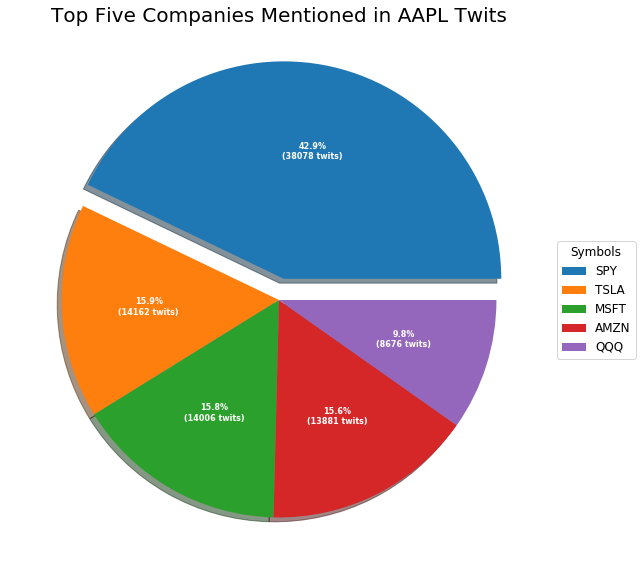

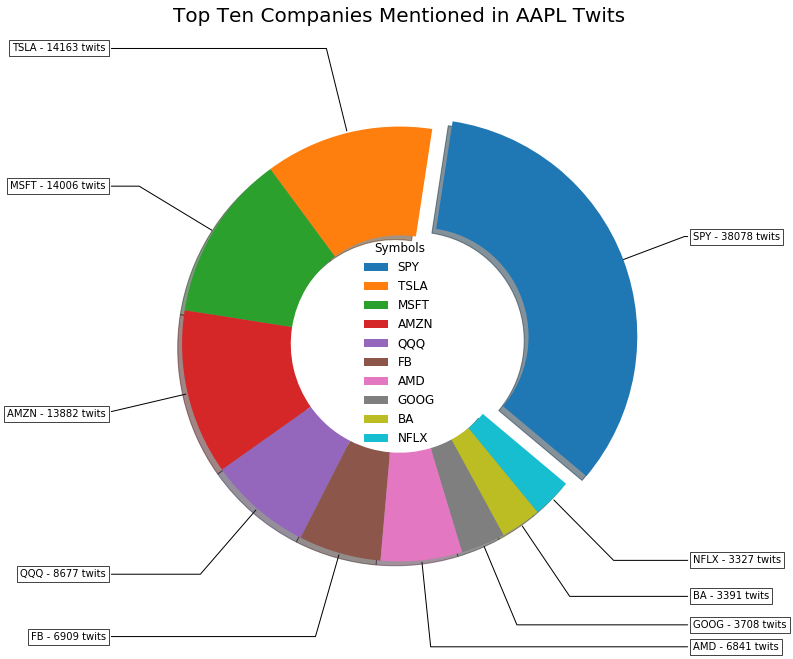

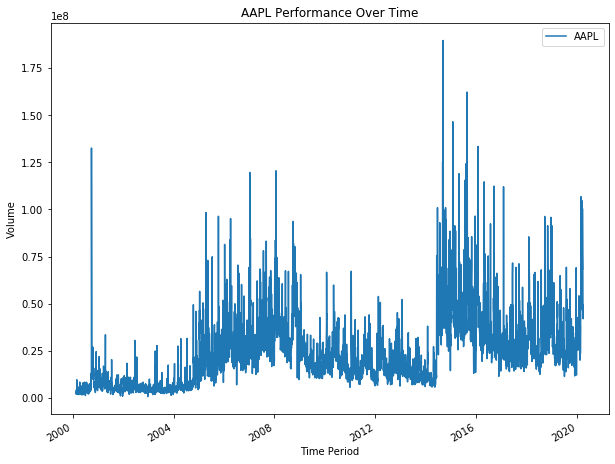

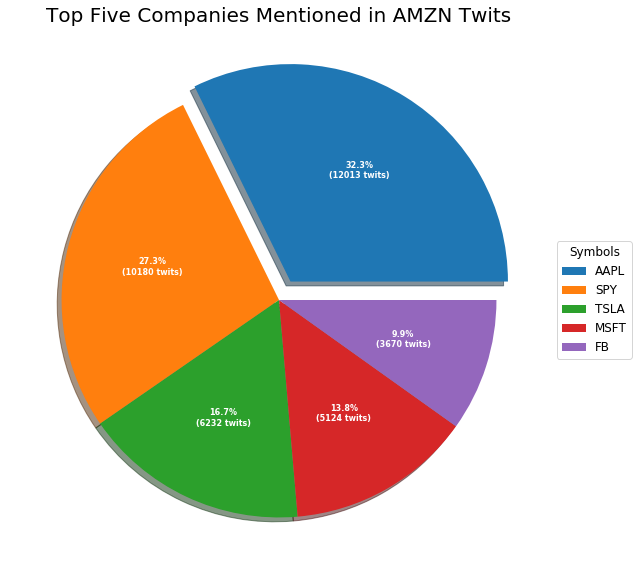

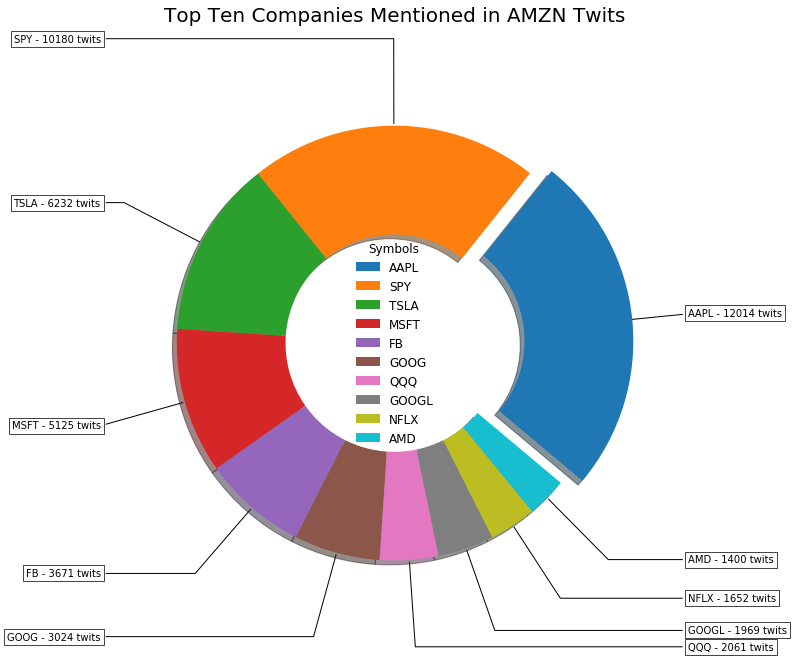

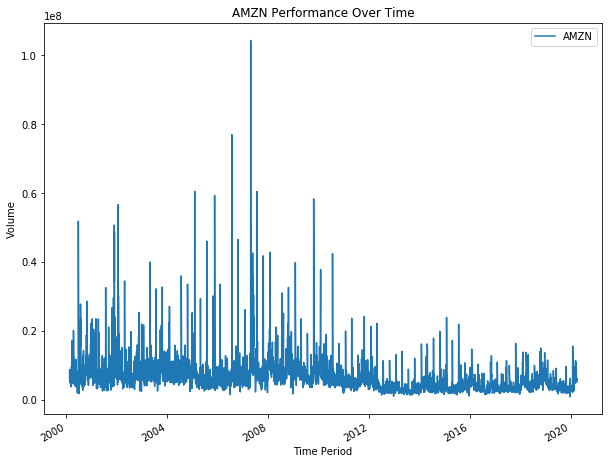

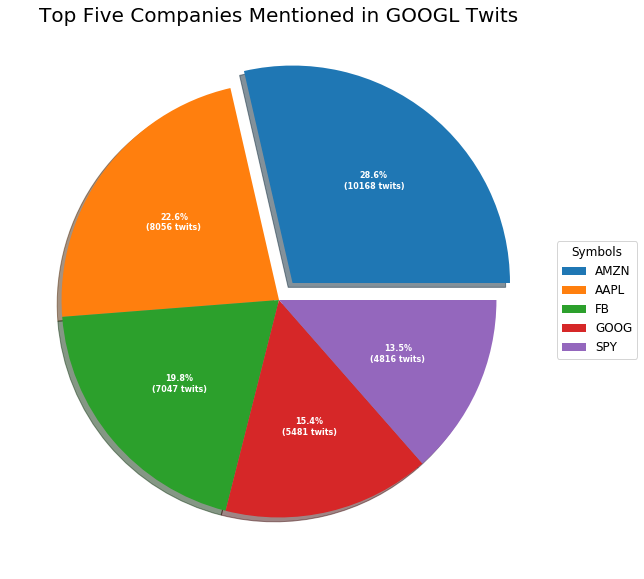

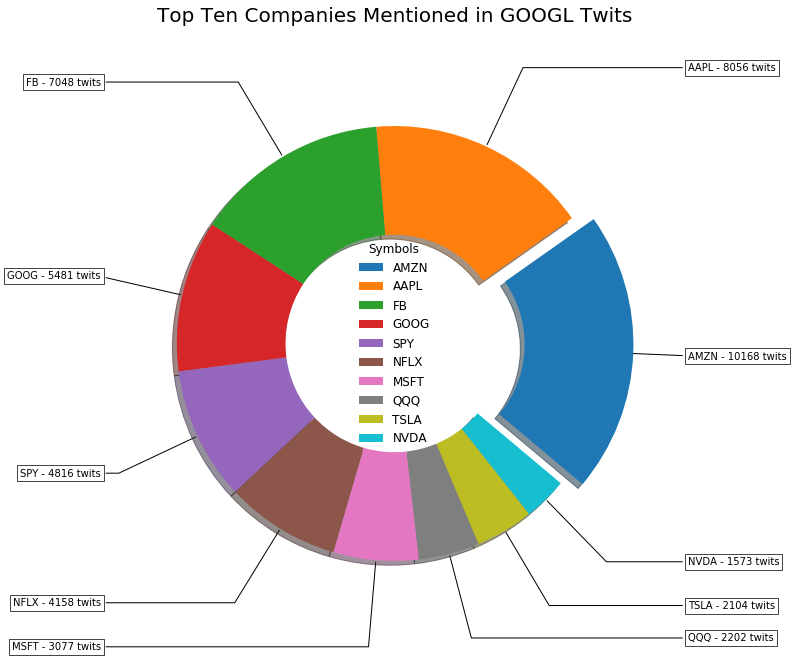

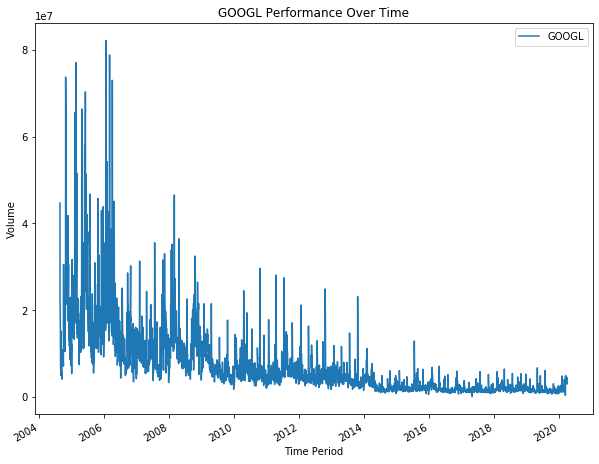

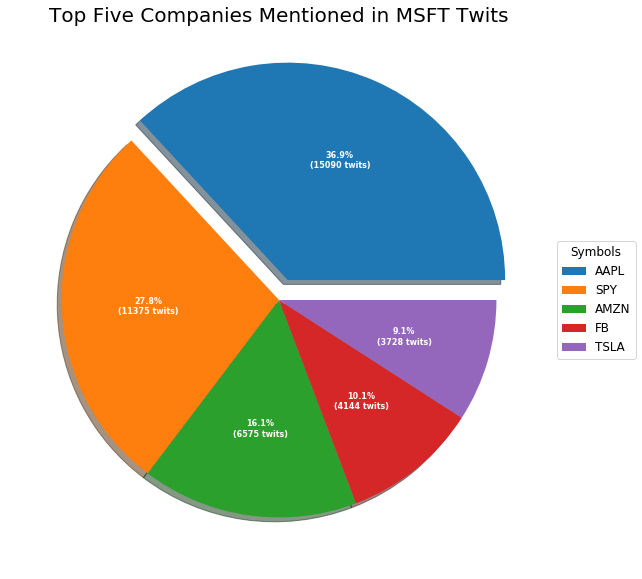

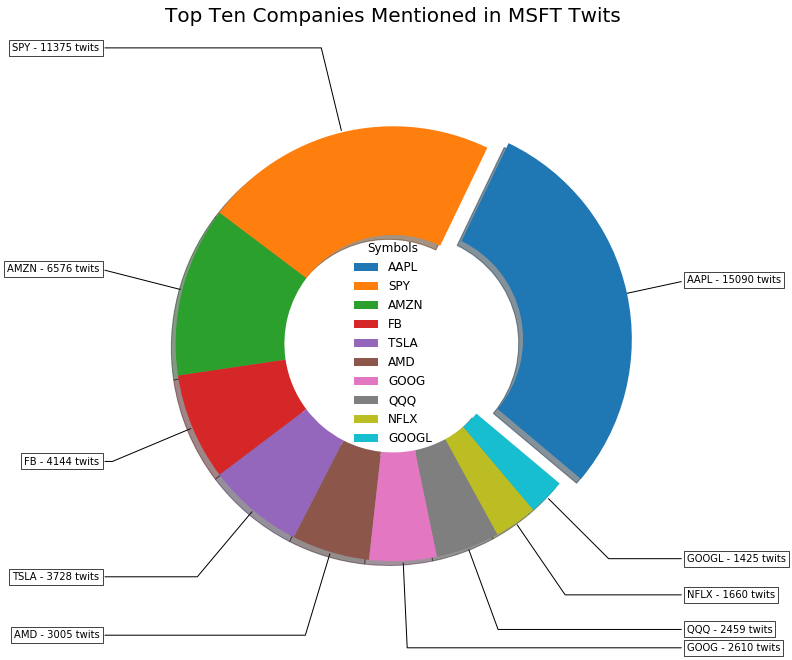

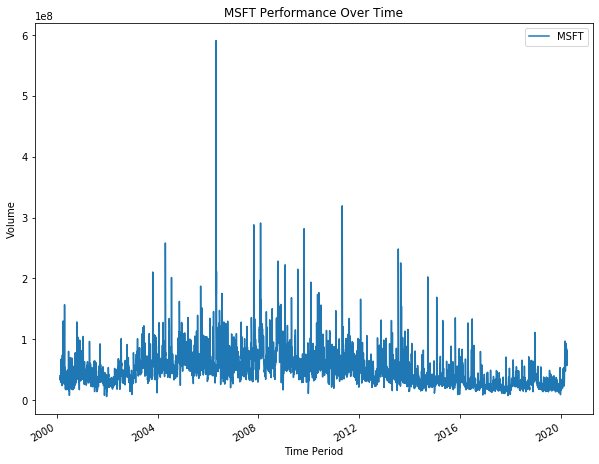

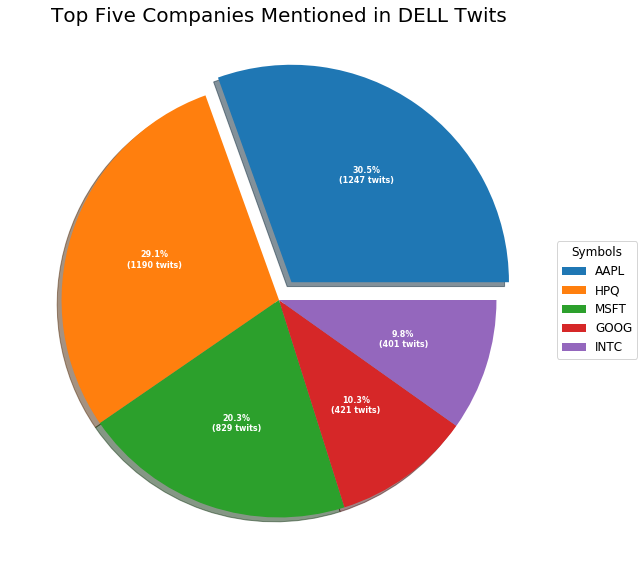

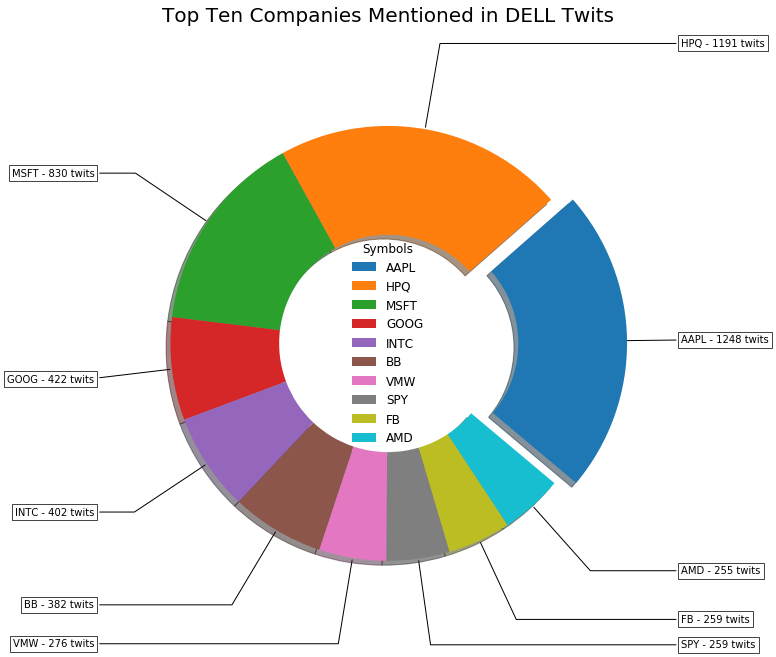

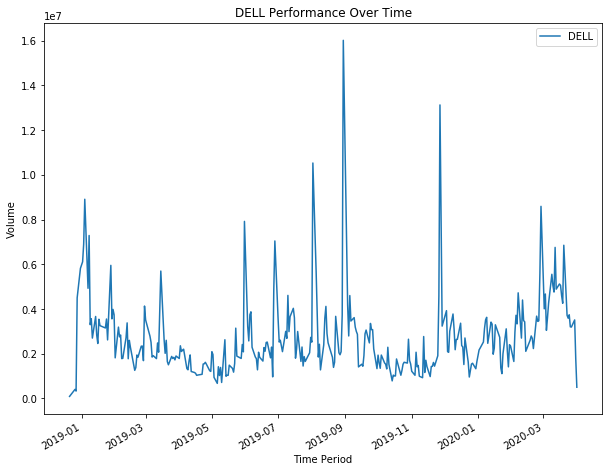

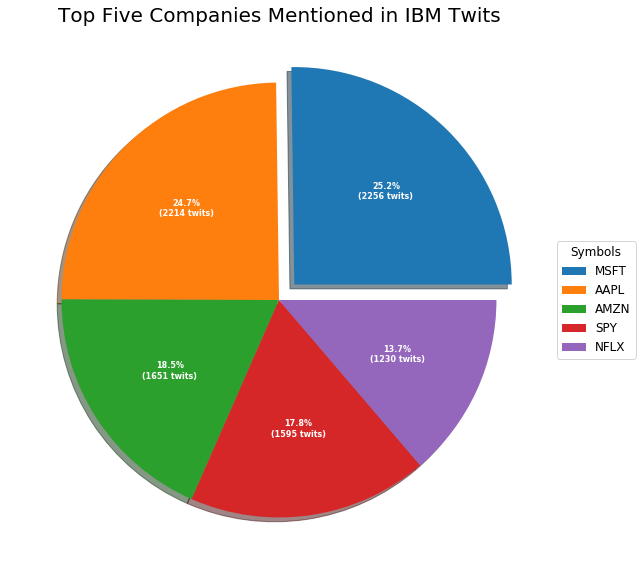

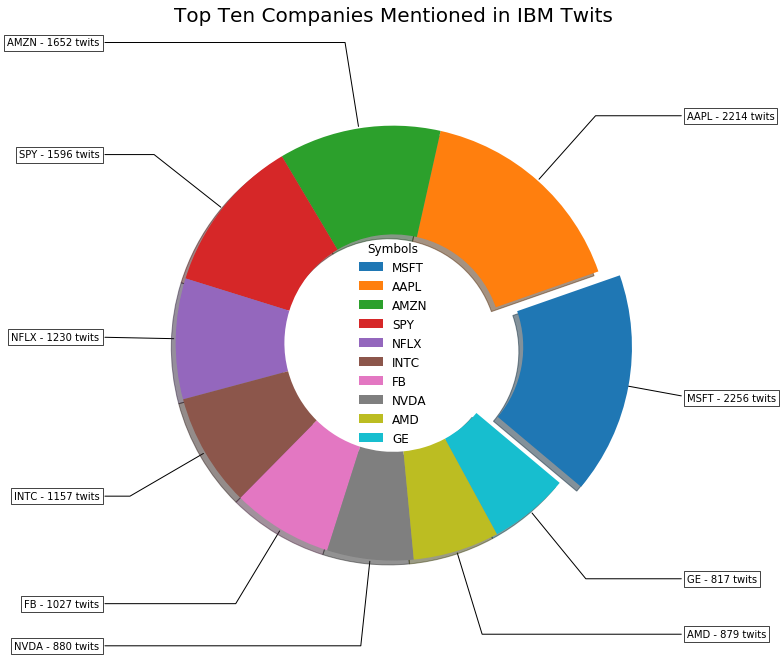

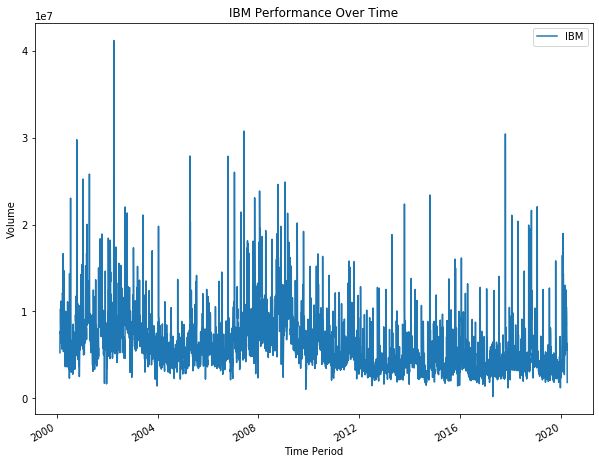

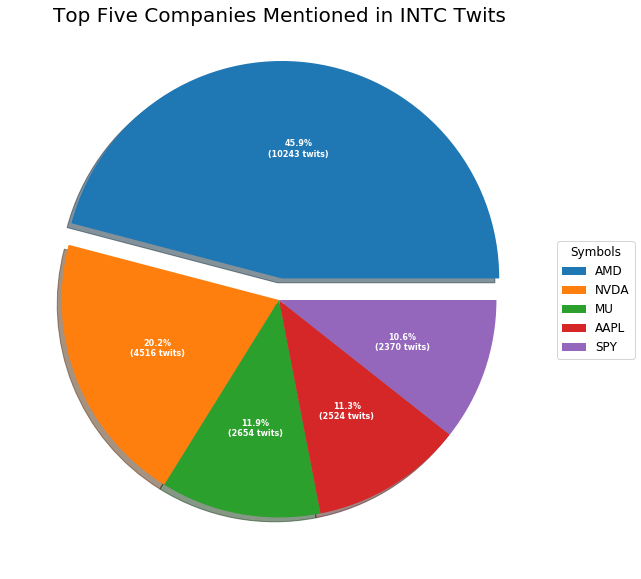

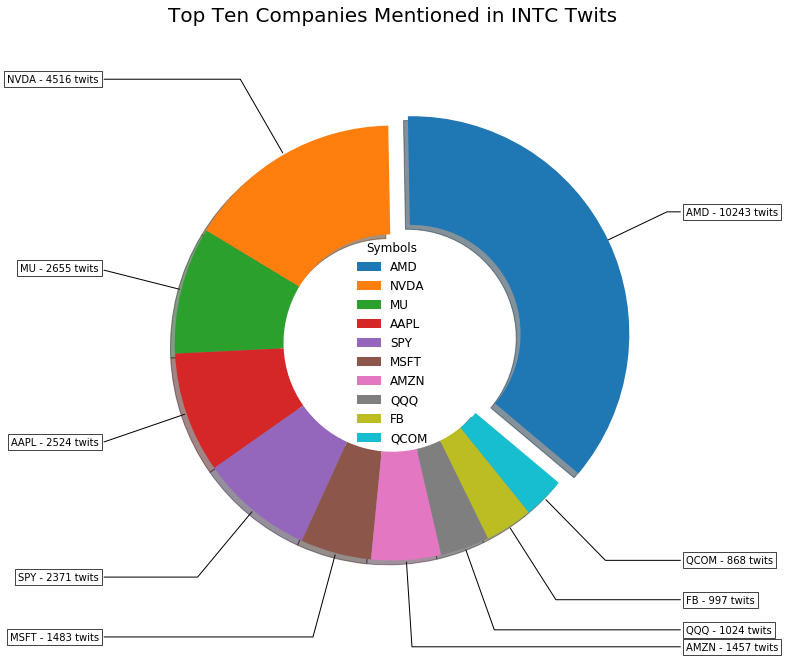

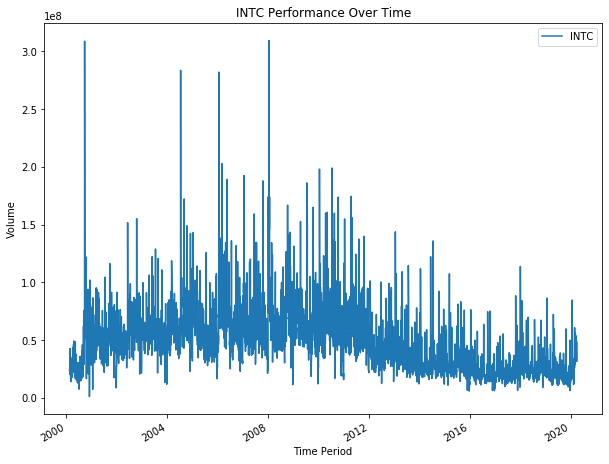

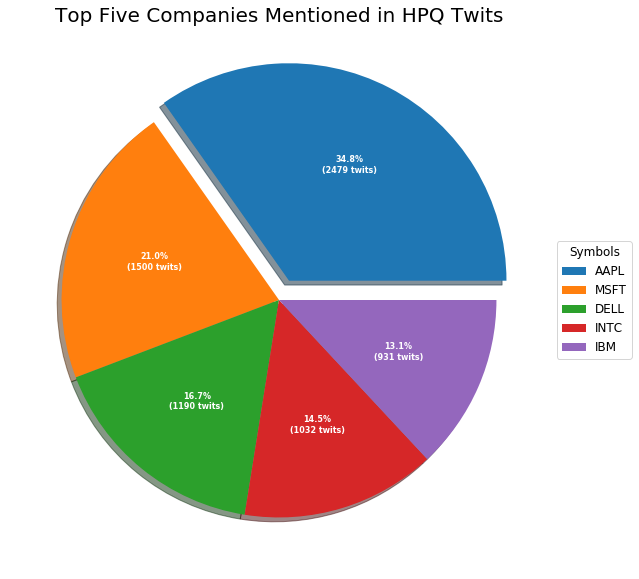

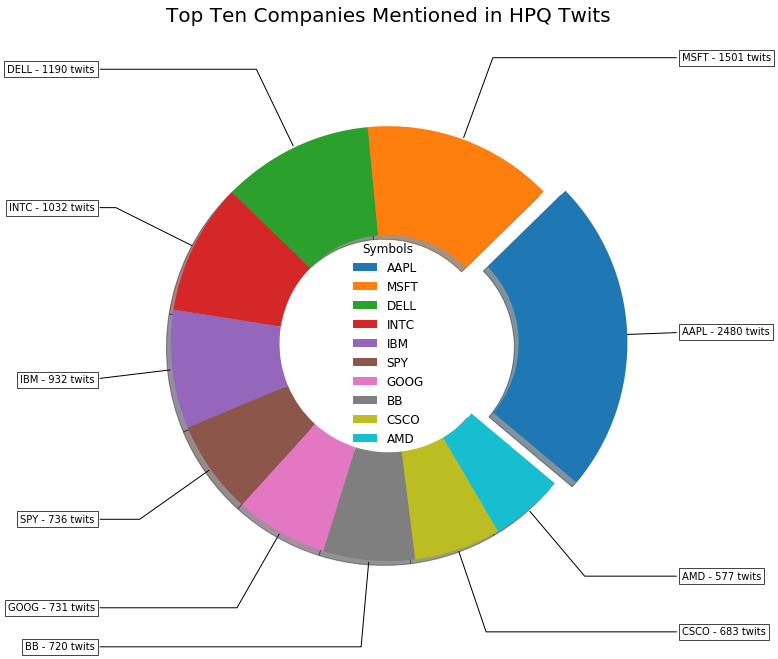

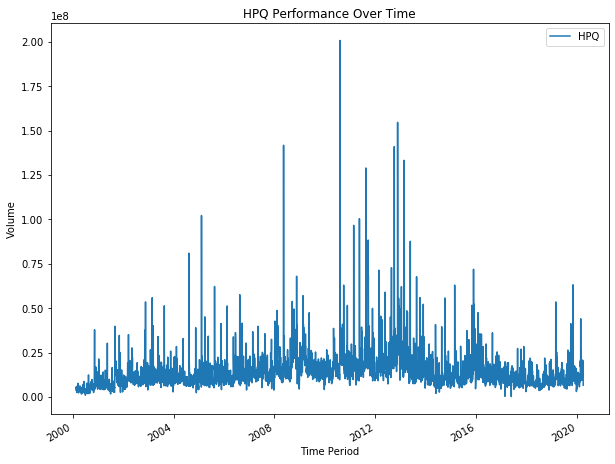

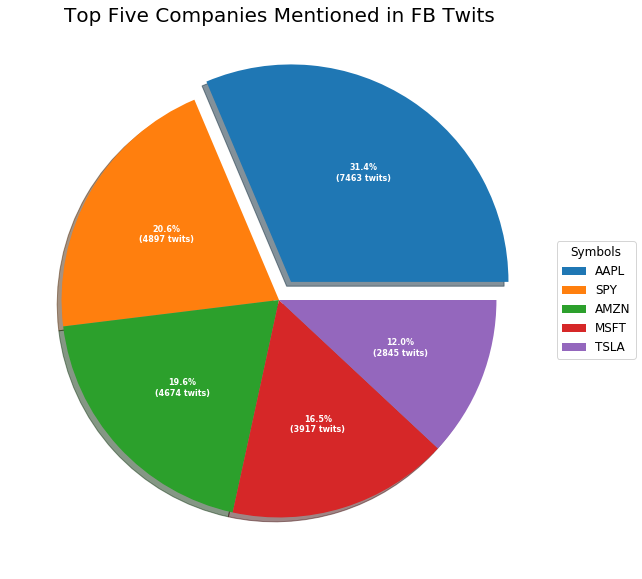

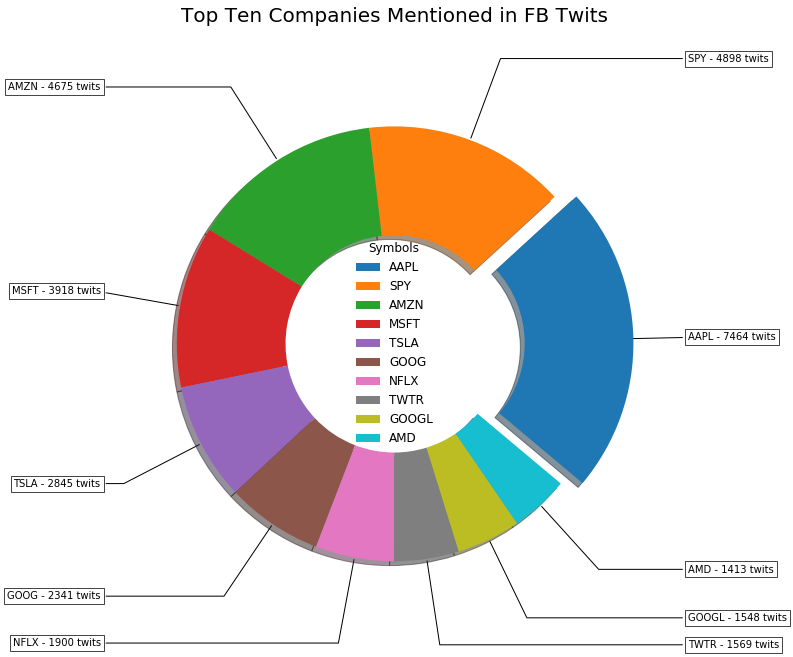

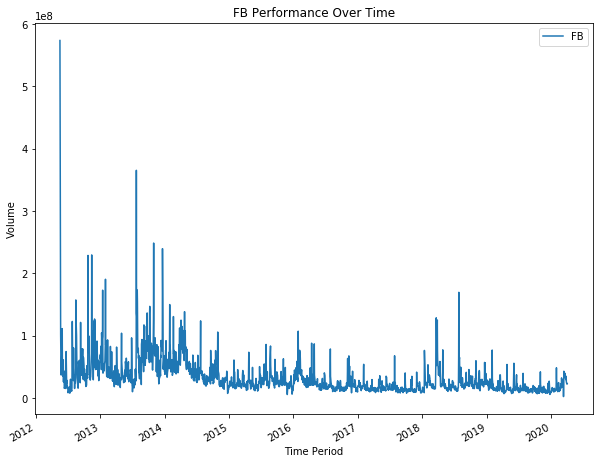

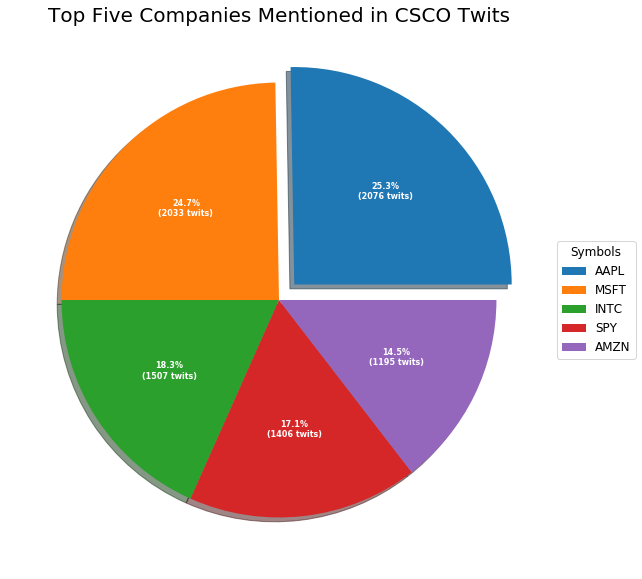

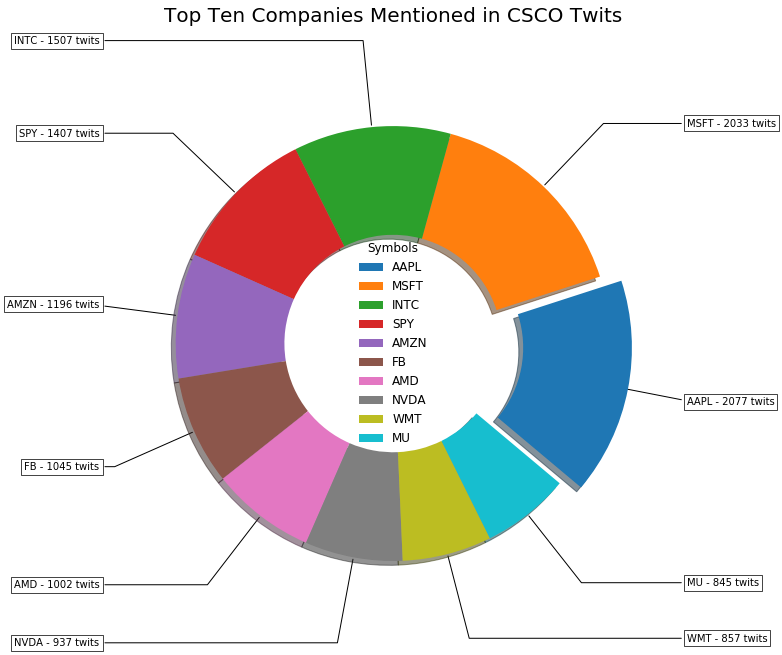

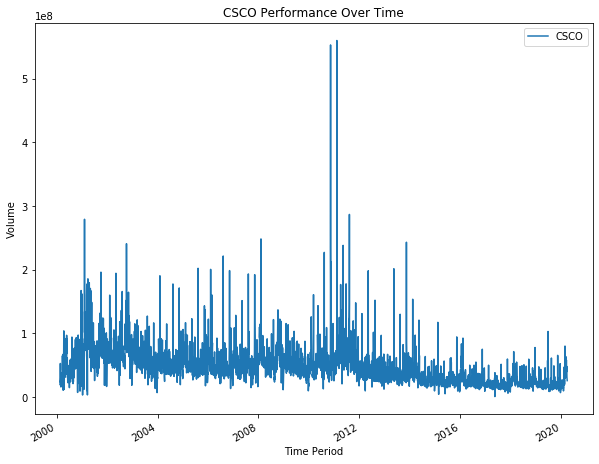

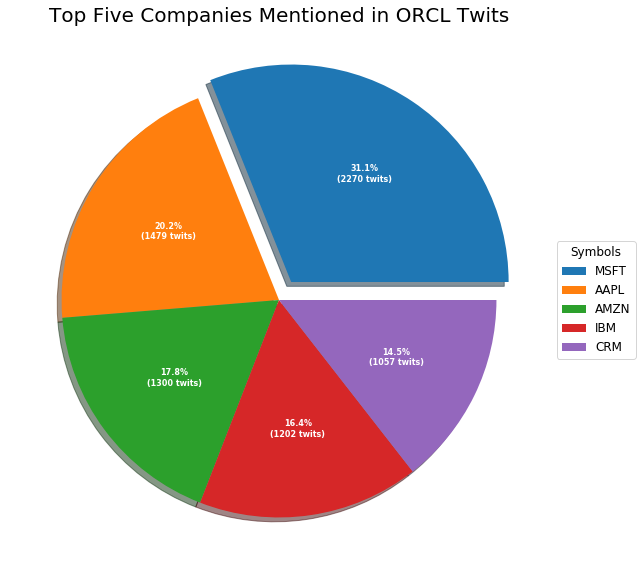

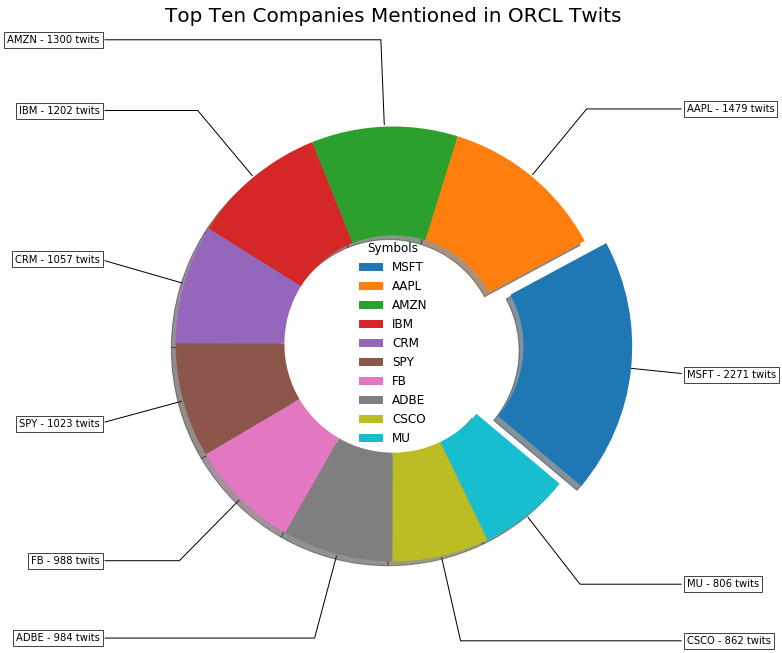

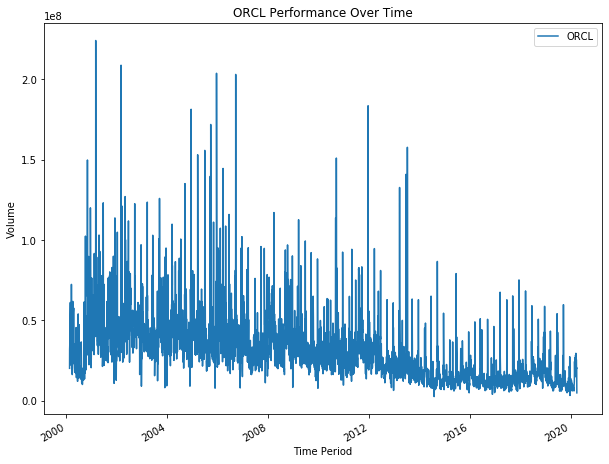

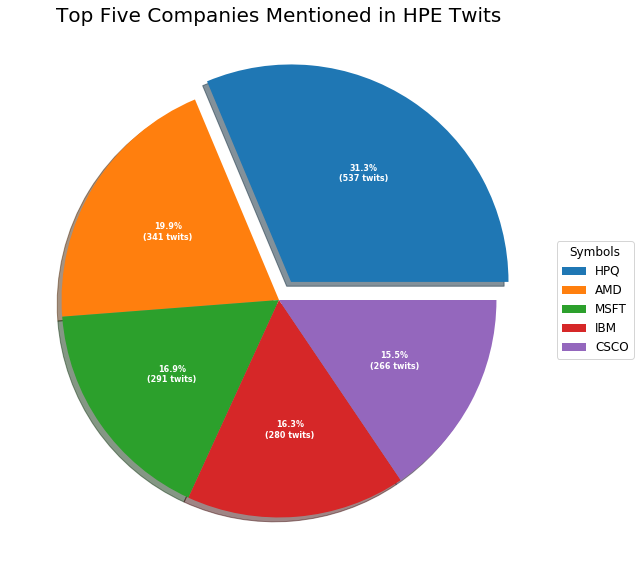

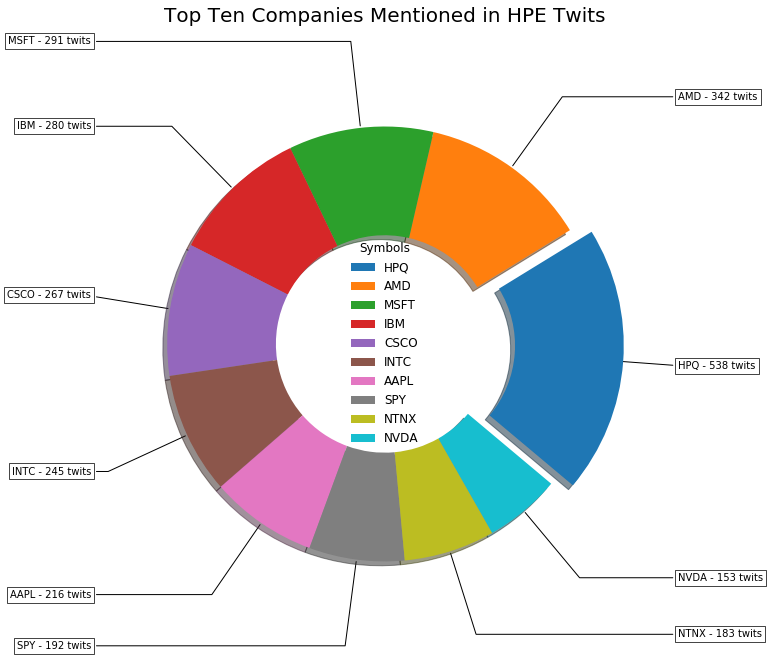

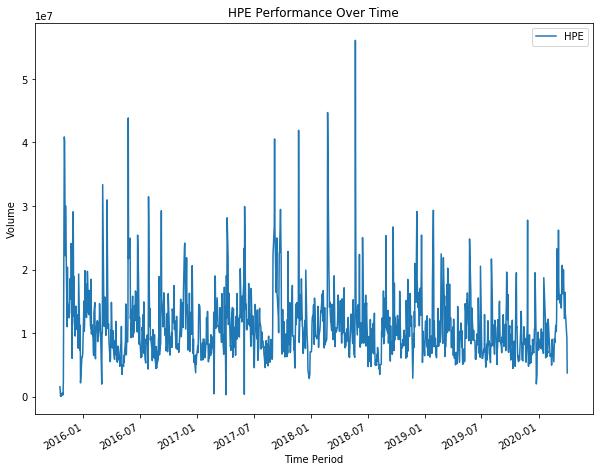

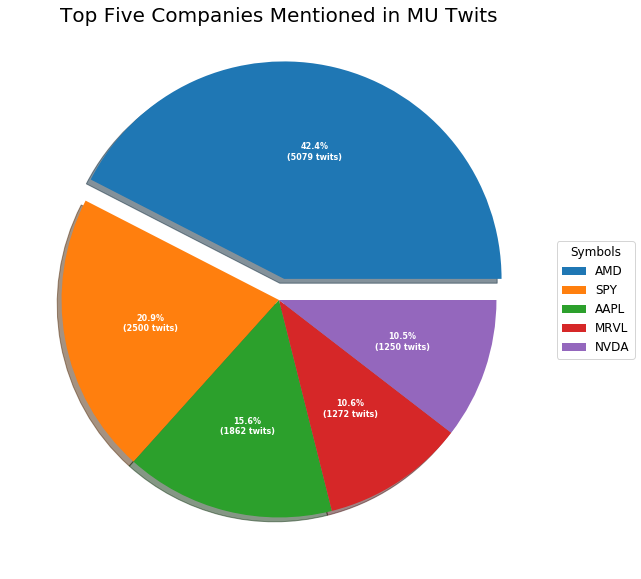

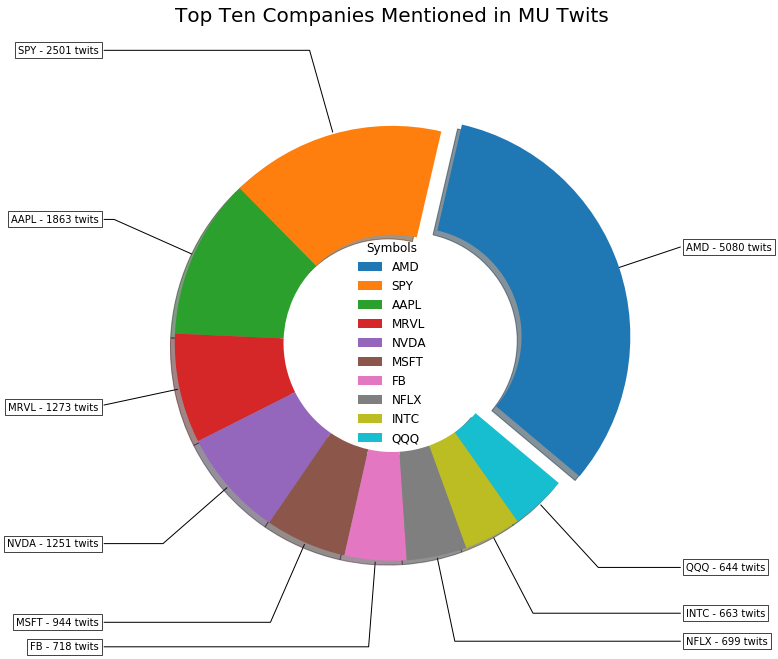

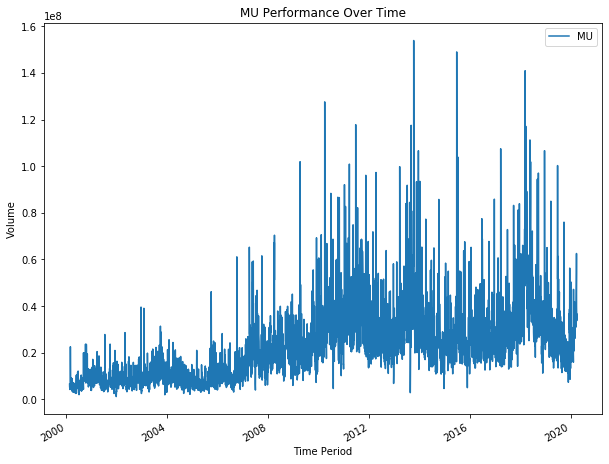

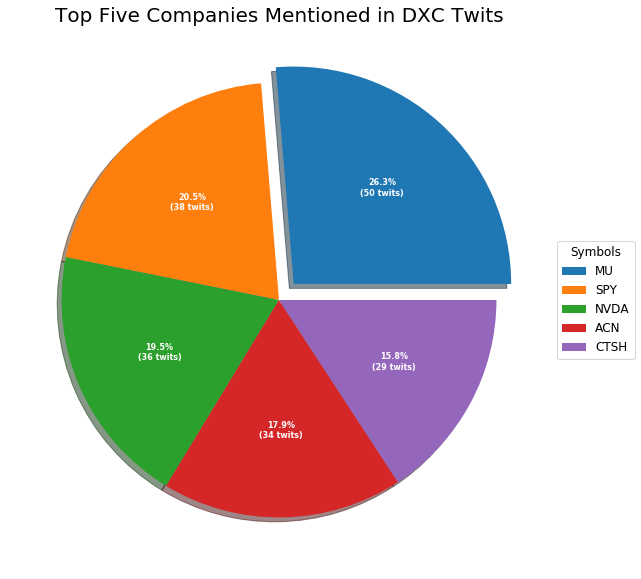

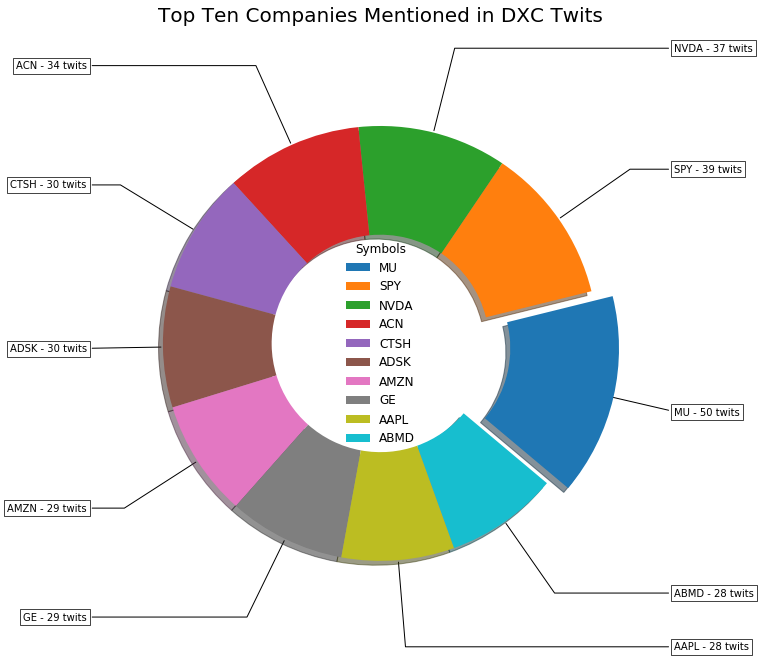

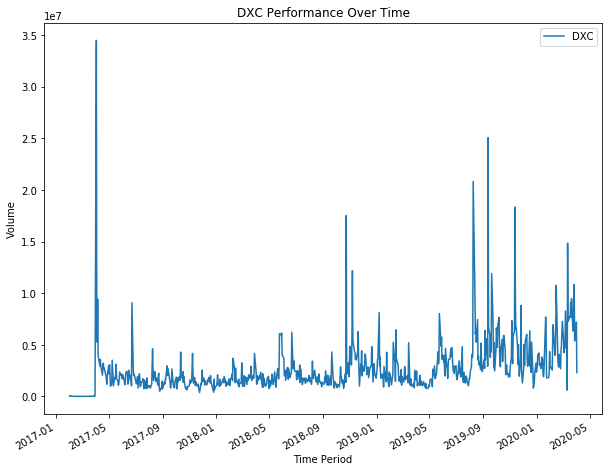

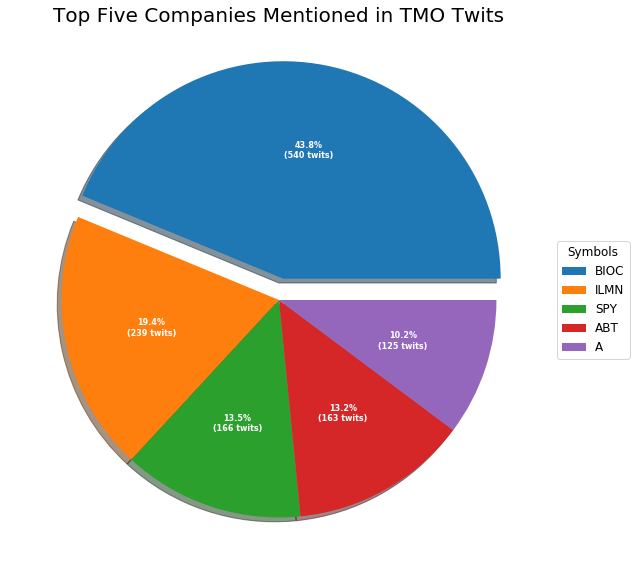

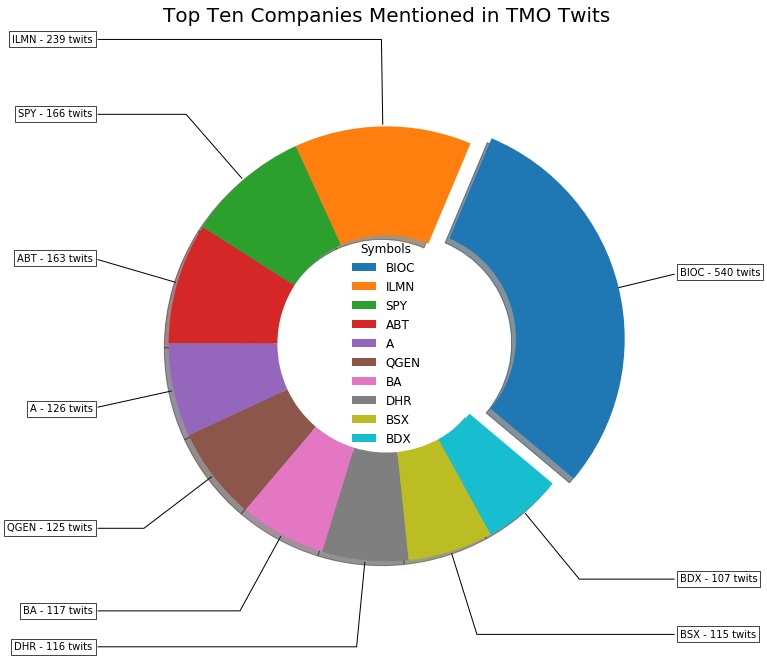

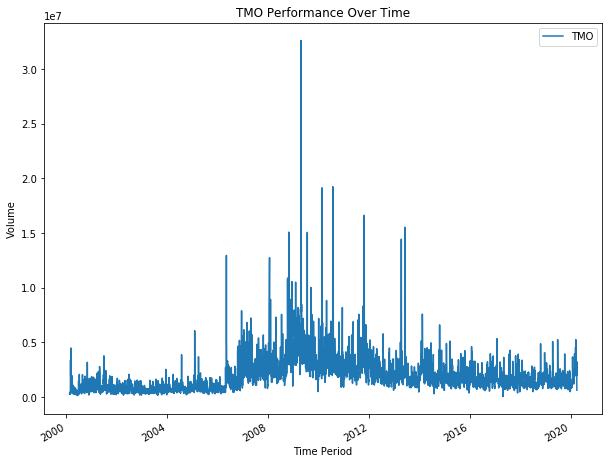

In [137]:
stockSymbol = ["AAPL", "AMZN", "GOOGL","MSFT", "DELL", "IBM", "INTC", "HPQ",
               "FB", "CSCO", "ORCL", "HPE", "MU", "DXC", "TMO"]
for i in stockSymbol:
    GetOtherCompanies('{}_Twits.csv'.format(i))
    GetVolume('{}Daily.csv'.format(i))

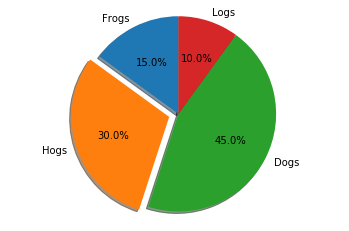

In [109]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()